In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import sklearn
import sklearn.model_selection
import sklearn.ensemble
import sklearn.metrics

In [2]:
# read the cleaned data for real estate listings and matched listings.

df_train = pd.read_csv('./Cleaned_Data/train_v00_tuned.csv')
df_train_match = pd.read_csv('./Cleaned_Data/train_match_v00_tuned.csv')

/var/folders/_w/k40rbx_x0yd88dyx542lggnc0000gn/T/ipykernel_91890/4091131495.py:1: DtypeWarning: Columns (18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv('./Cleaned_Data/train_v00_tuned.csv')


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83055 entries, 0 to 83054
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           83049 non-null  float64
 1   sourceId     83049 non-null  float64
 2   locationId   83049 non-null  float64
 3   regionId     83049 non-null  float64
 4   provinceId   83049 non-null  float64
 5   countryId    83049 non-null  float64
 6   typeId       83049 non-null  float64
 7   price        76873 non-null  float64
 8   rooms        8486 non-null   float64
 9   bedrooms     70207 non-null  float64
 10  bathrooms    68227 non-null  float64
 11  totalArea    56709 non-null  float64
 12  livingArea   30921 non-null  float64
 13  plotArea     44257 non-null  float64
 14  terraceArea  17130 non-null  float64
 15  title        78745 non-null  object 
 16  description  80189 non-null  object 
 17  features     42330 non-null  object 
 18  latitude     15921 non-null  object 
 19  long

In [4]:
# convert all categories to integer types.

df_train['id'] = df_train['id'].convert_dtypes('int')
df_train['sourceId'] = df_train['sourceId'].convert_dtypes('int')
df_train['locationId'] = df_train['locationId'].convert_dtypes('int')
df_train['locationId'] = df_train['locationId'].convert_dtypes('int')
df_train['regionId'] = df_train['regionId'].convert_dtypes('int')
df_train['provinceId'] = df_train['provinceId'].convert_dtypes('int')
df_train['countryId'] = df_train['countryId'].convert_dtypes('int')
df_train['typeId'] = df_train['typeId'].convert_dtypes('int')

In [8]:
# check if there are any rows which are filled with null. reading from the csv file caused some rows to be null and it is necessary to delete these rows.

df_train[df_train['id'].isna()]

,id,sourceId,locationId,regionId,provinceId,countryId,typeId,price,rooms,bedrooms,...,totalArea,livingArea,plotArea,terraceArea,title,description,features,latitude,longitude,thumbnails
80005,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80006,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80007,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80153,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80154,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80155,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# delete the 'all null' rows.

df_train.drop(df_train[df_train['id'].isna()].index.tolist(), inplace=True)

In [10]:
#reset the index

df_train.reset_index(inplace=True)

In [13]:
# drop the columns which are either mostly null or are not incidental to model setup.

df_train.drop(columns=['sourceId','latitude','longitude','thumbnails'], axis=1, inplace=True)

In [17]:
# convert rows of 'description' column to ''(blank) value if null.

df_train['description'][df_train['description'].isna()] = ''

/var/folders/_w/k40rbx_x0yd88dyx542lggnc0000gn/T/ipykernel_91890/2316002055.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['description'][df_train['description'].isna()] = ''


In [20]:
# convert rows of 'title' column to ''(blank) value if null.

df_train['title'][df_train['title'].isna()] = ''

/var/folders/_w/k40rbx_x0yd88dyx542lggnc0000gn/T/ipykernel_91890/3209238474.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['title'][df_train['title'].isna()] = ''


In [22]:
# # convert rows of 'features' column to ''(blank) value if null.

df_train['features'][df_train['features'].isna()] = ''

/var/folders/_w/k40rbx_x0yd88dyx542lggnc0000gn/T/ipykernel_91890/2370702250.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['features'][df_train['features'].isna()] = ''


In [25]:
# combine the 'title', 'description' and 'features' column to create a single feature column.

df_train['total_text'] = df_train['title'] + ' ' + df_train['description'] + ' ' + df_train['features']

In [26]:
# check for null values of the new text column if any.

df_train[df_train['total_text'].isna()]

,index,id,locationId,regionId,provinceId,countryId,typeId,price,rooms,bedrooms,bathrooms,totalArea,livingArea,plotArea,terraceArea,title,description,features,total_text


In [28]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83049 entries, 0 to 83048
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        83049 non-null  int64  
 1   id           83049 non-null  Int64  
 2   locationId   83049 non-null  Int64  
 3   regionId     83049 non-null  Int64  
 4   provinceId   83049 non-null  Int64  
 5   countryId    83049 non-null  Int64  
 6   typeId       83049 non-null  Int64  
 7   price        76873 non-null  float64
 8   rooms        8486 non-null   float64
 9   bedrooms     70207 non-null  float64
 10  bathrooms    68227 non-null  float64
 11  totalArea    56709 non-null  float64
 12  livingArea   30921 non-null  float64
 13  plotArea     44257 non-null  float64
 14  terraceArea  17130 non-null  float64
 15  title        83049 non-null  object 
 16  description  83049 non-null  object 
 17  features     83049 non-null  object 
 18  total_text   83049 non-null  object 
dtypes: I

In [30]:
# tokenize the new text feature column by removing non-alphabetic characters, punctuations, stop words etc. Also, create a list of the tokenized feature row elements.

from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
  
import string

list_words = []
              
for text in df_train['total_text']:
    tokens = word_tokenize(text)
    table = str.maketrans('', '', string.punctuation)
    tokens_p = [w.translate(table) for w in tokens]
    tokens_pa = [word for word in tokens_p if word.isalpha()]
    tokens_pal = [w.lower() for w in tokens_pa]
    porter = PorterStemmer()
    tokens_pals = [porter.stem(word) for word in tokens_pal]
    lemmatizer = WordNetLemmatizer()
    tokens_palsl = [lemmatizer.lemmatize(word) for word in tokens_pals]
    stop_words = set(stopwords.words('english'))
    tokens_palsls = [w for w in tokens_palsl if not w in stop_words]

    list_words.append(tokens_palsls)


In [33]:
# remove duplicate words from each tokenized feature row element.

list_words_unique = []

for i in range(0,len(list_words)):
    set_words = set(list_words[i])
    list_unique = list(set_words)
    list_words_unique.append(list_unique)

In [36]:
# De-tokenize each text feature row element.

from nltk.tokenize.treebank import TreebankWordDetokenizer

list_sents = []

for i in range(0,len(list_words)):
    list_sent = TreebankWordDetokenizer().detokenize(list_words_unique[i])
    list_sents.append(list_sent)


In [39]:
# now save the processed text feature as a new feature column.

df_train['text_processed'] = pd.DataFrame(list_sents)

In [40]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83049 entries, 0 to 83048
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           83049 non-null  int64  
 1   id              83049 non-null  Int64  
 2   locationId      83049 non-null  Int64  
 3   regionId        83049 non-null  Int64  
 4   provinceId      83049 non-null  Int64  
 5   countryId       83049 non-null  Int64  
 6   typeId          83049 non-null  Int64  
 7   price           76873 non-null  float64
 8   rooms           8486 non-null   float64
 9   bedrooms        70207 non-null  float64
 10  bathrooms       68227 non-null  float64
 11  totalArea       56709 non-null  float64
 12  livingArea      30921 non-null  float64
 13  plotArea        44257 non-null  float64
 14  terraceArea     17130 non-null  float64
 15  title           83049 non-null  object 
 16  description     83049 non-null  object 
 17  features        83049 non-null 

In [46]:
# drop all original text feature columns as these have now been incorporated inside the new processed text feature column.

df_train.drop(columns=['title','description','features','total_text'], axis=1, inplace=True)

In [48]:
# drop the extraneous index column.

df_train.drop(columns=['index'], axis=1, inplace=True)

In [49]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83049 entries, 0 to 83048
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              83049 non-null  Int64  
 1   locationId      83049 non-null  Int64  
 2   regionId        83049 non-null  Int64  
 3   provinceId      83049 non-null  Int64  
 4   countryId       83049 non-null  Int64  
 5   typeId          83049 non-null  Int64  
 6   price           76873 non-null  float64
 7   rooms           8486 non-null   float64
 8   bedrooms        70207 non-null  float64
 9   bathrooms       68227 non-null  float64
 10  totalArea       56709 non-null  float64
 11  livingArea      30921 non-null  float64
 12  plotArea        44257 non-null  float64
 13  terraceArea     17130 non-null  float64
 14  text_processed  83049 non-null  object 
dtypes: Int64(6), float64(8), object(1)
memory usage: 10.0+ MB


In [403]:
# save the final featured dataset in a csv file for future reference.

df_train.to_csv('./Cleaned_Data/train_nlp_v00.csv')

In [55]:
# function to calculate percentage of common words in textual descriptions of two real estate listings.

def textual_similarity(text_id1, text_id2):

    common_elements = set(text_id1) & set(text_id2)

    similarity_ratio = len(common_elements)/(min(len(text_id1), len(text_id2))+1)

    return(similarity_ratio)

In [56]:
# function to create the final set of features for similarity match between two real estate listings.

def create_feature_list(df_train_match, df_train):

    feature_list = []
        
    for i in range(len(df_train_match)):
        
        list_id1 = []
        list_id2 = []

        compared_list = []

        list_id1 = df_train[df_train['id']==df_train_match['id1'].iloc[i]].values.tolist()
        list_id2 = df_train[df_train['id']==df_train_match['id2'].iloc[i]].values.tolist()
        
        compared_list.append(1) if list_id1[0][1] == list_id2[0][1] else compared_list.append(0)
        compared_list.append(1) if list_id1[0][2] == list_id2[0][2] else compared_list.append(0)
        compared_list.append(1) if list_id1[0][3] == list_id2[0][3] else compared_list.append(0)
        compared_list.append(1) if list_id1[0][4] == list_id2[0][4] else compared_list.append(0)
        compared_list.append(1) if list_id1[0][5] == list_id2[0][5] else compared_list.append(0)
        
        compared_list.append(abs(list_id1[0][6]-list_id2[0][6])/max(list_id1[0][6],list_id2[0][6]))
        compared_list.append(abs(list_id1[0][7]-list_id2[0][7])/max(list_id1[0][7],list_id2[0][7]))
        compared_list.append(abs(list_id1[0][8]-list_id2[0][8])/max(list_id1[0][8],list_id2[0][8]))
        compared_list.append(abs(list_id1[0][9]-list_id2[0][9])/max(list_id1[0][9],list_id2[0][9]))
        compared_list.append(abs(list_id1[0][10]-list_id2[0][10])/max(list_id1[0][10],list_id2[0][10]))
        compared_list.append(abs(list_id1[0][11]-list_id2[0][11])/max(list_id1[0][11],list_id2[0][11]))
        compared_list.append(abs(list_id1[0][12]-list_id2[0][12])/max(list_id1[0][12],list_id2[0][12]))
        compared_list.append(abs(list_id1[0][13]-list_id2[0][13])/max(list_id1[0][13],list_id2[0][13]))

        compared_list.append(textual_similarity(list_id1[0][14].split(),list_id2[0][14].split()))

        feature_list.append(compared_list)
        
    return(feature_list)
    

In [ ]:
# create the final feature set.

feature_list = create_feature_list(df_train_match, df_train)

In [60]:
len(feature_list)

884125

In [62]:
# assign feature set with names.

df_features = pd.DataFrame(feature_list, columns=['location_match?','region_match?','province_match?','country_match?','type_match?',
                                                  'price_diff','rooms_diff','bedrooms_diff','bathrooms_diff','total_area_diff',
                                                  'living_area_diff','plot_area_diff','terrace_area_diff','textual_similarity'])

In [64]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884125 entries, 0 to 884124
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   location_match?     884125 non-null  int64  
 1   region_match?       884125 non-null  int64  
 2   province_match?     884125 non-null  int64  
 3   country_match?      884125 non-null  int64  
 4   type_match?         884125 non-null  int64  
 5   price_diff          676378 non-null  float64
 6   rooms_diff          5012 non-null    float64
 7   bedrooms_diff       831271 non-null  float64
 8   bathrooms_diff      762866 non-null  float64
 9   total_area_diff     514004 non-null  float64
 10  living_area_diff    191446 non-null  float64
 11  plot_area_diff      439810 non-null  float64
 12  terrace_area_diff   58265 non-null   float64
 13  textual_similarity  884125 non-null  float64
dtypes: float64(9), int64(5)
memory usage: 94.4 MB


In [381]:
# write the final set of features to csv for future reference.

df_features.to_csv('./Cleaned_Data/features_nlp_v00.csv', index=False)

In [65]:
# create the target values.

y = df_train_match['match?'].values

In [66]:
y.shape

(884125,)

In [384]:
# breaking data into train, test list.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_features, y, test_size=0.2, random_state=42)

In [385]:
X_train.shape

(707300, 14)

In [387]:
X_test.shape

(176825, 14)

In [391]:
# Run grid search to find the best set of parameterss for XGBoost classifer.

from sklearn.model_selection import GridSearchCV

estimator = xgb.XGBClassifier()

parameters = {
    'max_depth': [5, 10, 15],
    'n_estimators': range(50, 200, 25),
    'learning_rate': np.arange(0.01, 0.1, 0.01),
    'random_state': [42]
}

gs_xgb_nlp = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    n_jobs = 5,
    cv = 5
)

gs_xgb_nlp.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=5,
             param_grid={'learning_rate': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]),
                         'max_depth': [5, 10, 15],
                         'n_estimators': range(50, 200, 25),
                         'random_state': [42]})

In [392]:
gs_xgb_nlp.best_params_

{'learning_rate': 0.09,
 'max_depth': 15,
 'n_estimators': 175,
 'random_state': 42}

In [393]:
gs_xgb_nlp.best_score_

0.9083147179414676

In [394]:
# Run XGBoost classifier with the best set of parameters.

xgb_cl_nlp2 = xgb.XGBClassifier(max_depth=15, learning_rate=0.09, n_estimators=175, random_state=42)

xgb_cl_nlp2.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.09, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=15, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=175, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=42, ...)

accuracy Score: 0.9119298741693765


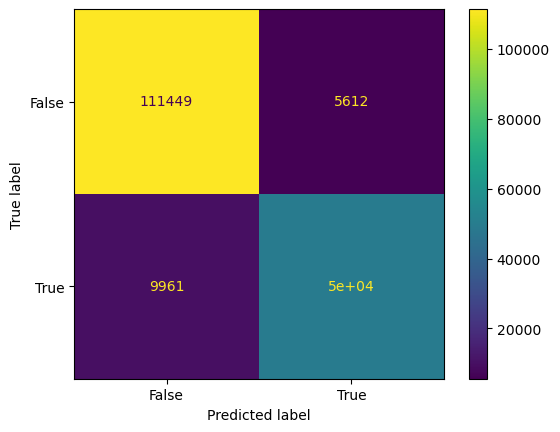

In [395]:
# Determine confusion matrix for the trained model.

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = xgb_cl_nlp2.predict(X_test)

print("accuracy Score:", accuracy_score(y_test, y_pred))

confusion_matrix = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()

plt.show()

In [397]:
# Run another classifer "HistGradientBoostClassifier" for comparison.

from sklearn.ensemble import HistGradientBoostingClassifier

hgbc_cl_nlp = HistGradientBoostingClassifier(random_state=42).fit(X_train, y_train)

hgbc_cl_nlp.fit(X_train, y_train)

HistGradientBoostingClassifier(random_state=42)

accuracy Score: 0.8687968330270041


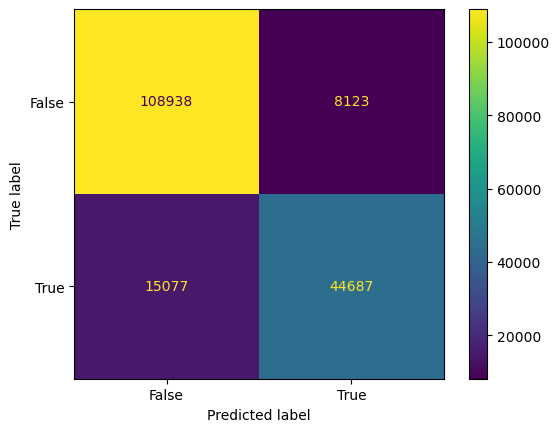

In [398]:
# Determine confusion matrix for the trained model.

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

y_pred_hgbc_nlp = hgbc_cl_nlp.predict(X_test)

print("accuracy Score:", accuracy_score(y_test, y_pred_hgbc_nlp))

confusion_matrix = confusion_matrix(y_test, y_pred_hgbc_nlp)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()

plt.show()

In [399]:
# save all the models to files for future retrieval.

import pickle

# Save to a file using Pickle
with open('model_xgb_nlp.pkl', 'wb') as file_handle: # wb=write binary
    pickle.dump(xgb_cl_nlp2, file_handle)

In [67]:
# extract the textual similarity column.

df_text = df_features['textual_similarity']

In [68]:
df_text.info()

<class 'pandas.core.series.Series'>
RangeIndex: 884125 entries, 0 to 884124
Series name: textual_similarity
Non-Null Count   Dtype  
--------------   -----  
884125 non-null  float64
dtypes: float64(1)
memory usage: 6.7 MB


In [69]:
y.shape

(884125,)

In [70]:
# Perform train, test split on the textual similiarity data.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_text, y, test_size=0.2, random_state=42)

In [71]:
# Train XGBoost model on the textual similarity data alone.

import xgboost as xgb

xgb_cl_nlp_only = xgb.XGBClassifier(max_depth=15, learning_rate=0.09, n_estimators=175, random_state=42)

xgb_cl_nlp_only.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.09, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=15, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=175, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=42, ...)

accuracy Score: 0.7144408313304115


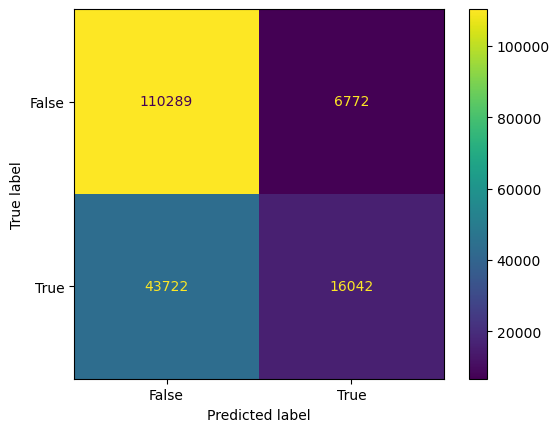

In [72]:
# determine confusion matrix and accuracy score based on only textual similarity.

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = xgb_cl_nlp_only.predict(X_test)

print("accuracy Score:", accuracy_score(y_test, y_pred))

confusion_matrix = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()

plt.show()

In [ ]:
# save the new model to files.

import pickle

# Save to a file using Pickle
with open('model_xgb_nlp_only.pkl', 'wb') as file_handle: # wb=write binary
    pickle.dump(xgb_cl_nlp_only, file_handle)